# Problem 18

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

training_set = pd.read_csv('./npf_train.csv')
del training_set['id']
del training_set['partlybad']
del training_set['date']
y = training_set['class4'].astype('category')

training_set = training_set[[c for c in training_set if 'mean' in c]].rename(columns= lambda x: x.replace('.mean', 'mean'))

training_set = pd.concat([training_set, y], axis=1)
colss = training_set.columns.difference(['class4'])
scaled = preprocessing.scale(training_set[training_set.columns.difference(['class4'])])
# scaled = pd.concat([pd.DataFrame(scaled, columns=colss), y], axis=1)
#training_set = pd.concat([pd.DataFrame(scaled, columns=colss), y], axis=1)

In [2]:
training_set['class4'] = training_set['class4'].cat.codes

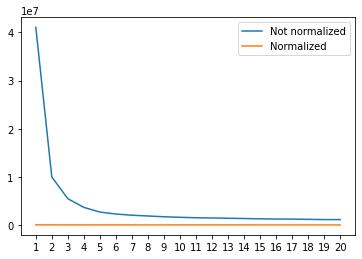

In [3]:
# task a
from sklearn.cluster import KMeans
toplotY_un = []
toplotX_un = []
toplotX_sc = []
toplotY_sc = []
for i in range(1, 21):
    km = KMeans(n_clusters=i).fit(training_set[training_set.columns.difference(['class4'])])
    toplotY_un.append(-1*km.score(training_set[training_set.columns.difference(['class4'])]))
    toplotX_un.append(str(i))

    km = KMeans(n_clusters=i).fit(scaled)
    toplotY_sc.append(-1*km.score(scaled))
    toplotX_sc.append(str(i))

plt.plot(toplotX_un, toplotY_un, label='Not normalized')
plt.plot(toplotX_sc, toplotY_sc, label='Normalized')
plt.legend()
plt.show()
# not appreciable bc unscaled is HUGE

In [4]:
toplotY_sc

[22899.999999999993,
 15869.168844721906,
 13147.730831928027,
 10845.54542406677,
 9721.85276196181,
 9114.481702253473,
 8710.037463131892,
 8267.927506498807,
 7896.641887813164,
 7608.535772259967,
 7329.800582322089,
 7044.47080452127,
 6792.264272305343,
 6661.316485423587,
 6434.96222248738,
 6229.296165524172,
 6154.216707369852,
 6080.210374598219,
 5832.040716217323,
 5701.86207865343]

In [3]:
# task b
from sklearn.metrics import confusion_matrix
import seaborn as sns

km = KMeans(n_clusters=4).fit(scaled)
y_pred = km.predict(scaled)
y_true = training_set['class4']

cm = confusion_matrix(y_true, y_pred)

# plt.matshow(cm)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)

NameError: name 'KMeans' is not defined

<AxesSubplot:>

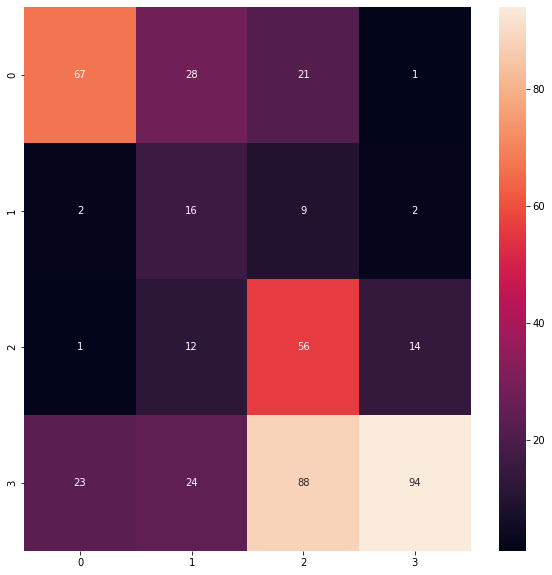

In [32]:
# spaghetti but ok
new_cm = [[67, 28, 21, 1], [2,16,9,2], [1,12,56,14], [23,24,88,94]]
plt.figure(figsize=(10,10))
sns.heatmap(new_cm, annot=True)

In [ ]:
# task c
import sys

toplotX = []
toplotY = []
min = float('inf')
max = 0

for i in range(1, 1001):
    km = KMeans(n_clusters=4, init='random').fit(scaled)
    l = -1*km.score(scaled)
    toplotY.append(l)
    toplotX.append(i)
    if l < min:
        min = l
    if l > max:
        max = l
    print(i)
    sys.stdout.flush()

10845.407939650557 10878.13091095091


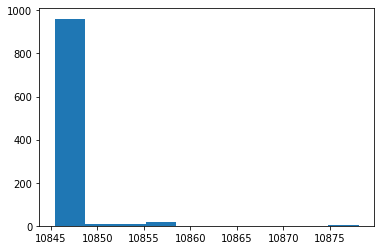

In [39]:
plt.hist(toplotY)
print(min, max)

In [4]:
# task d
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix, **kwargs)


agg_complete = AgglomerativeClustering(linkage='complete', compute_distances=True).fit(scaled)
agg_single = AgglomerativeClustering(linkage='single', compute_distances=True).fit(scaled)

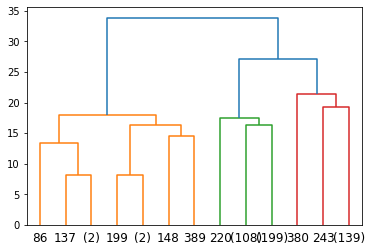

In [5]:
plot_dendrogram(agg_complete, truncate_mode="level", p=3)

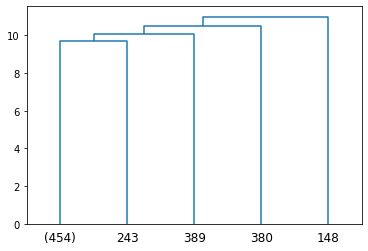

In [6]:
plot_dendrogram(agg_single, truncate_mode="level", p=3)

In [23]:
y_pred_comp = AgglomerativeClustering(linkage='complete', compute_distances=True, n_clusters=4).fit_predict(scaled)

y_pred_sing = AgglomerativeClustering(linkage='single', compute_distances=True, n_clusters=4).fit_predict(scaled)


<AxesSubplot:>

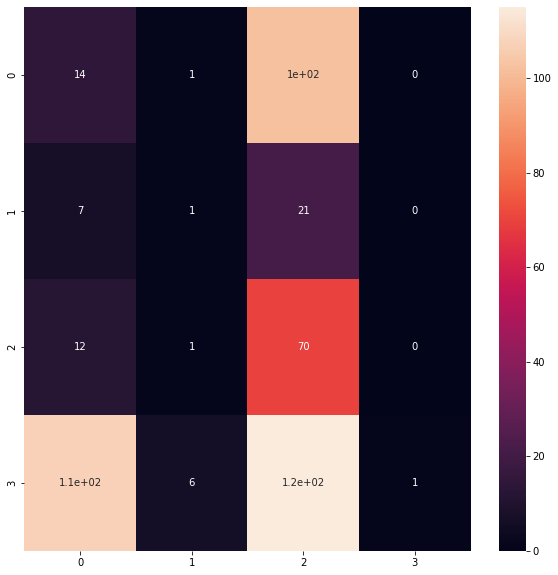

In [24]:
y_true = training_set['class4']
cm = confusion_matrix(y_true, y_pred_comp)

# plt.matshow(cm)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)

<AxesSubplot:>

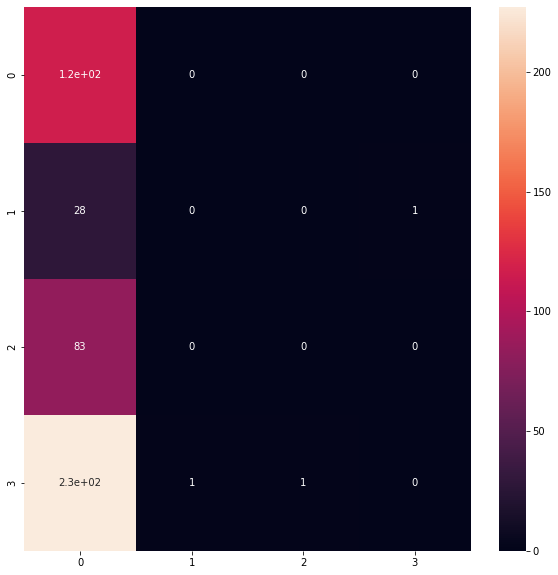

In [25]:
y_true = training_set['class4']
cm = confusion_matrix(y_true, y_pred_sing)

# plt.matshow(cm)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)

# Problem 19

In [76]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

def change_lab(x):
    if x == 'nonevent':
        return 0
    if x == 'Ia':
        return 1
    if x == 'Ib':
        return 2
    return 3

training_set = pd.read_csv('./npf_train.csv')
del training_set['id']
del training_set['partlybad']
del training_set['date']
training_set['class4'] = training_set['class4'].apply(lambda x: change_lab(x))


scaled = preprocessing.scale(training_set[training_set.columns.difference(['class4'])])

X = training_set[training_set.columns.difference(['class4'])]
y = training_set['class4']



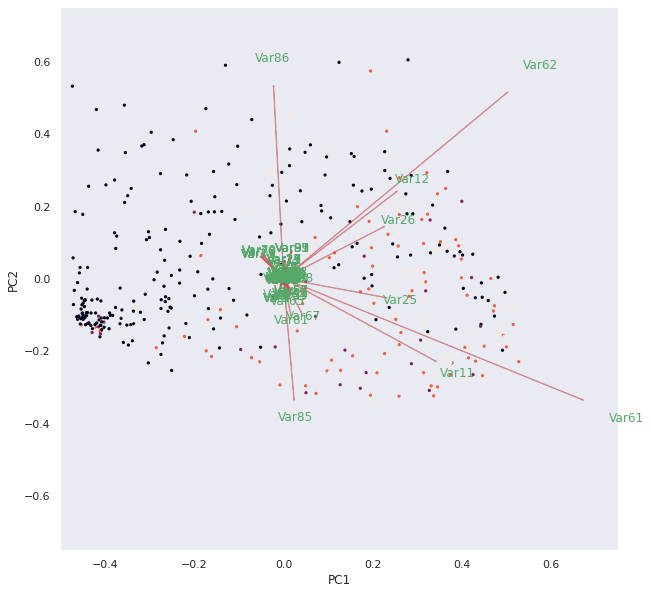

In [77]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y, s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-0.5,0.75)
    plt.ylim(-.75,.75)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

# scaler = StandardScaler()
# scaler.fit(X)
# X=scaler.transform(X)    


model = PCA()
x_new = model.fit_transform(X)

plt.figure(figsize=(10,10))
biplot(x_new[:,0:2],np.transpose(model.components_[0:2, :]))
plt.show()


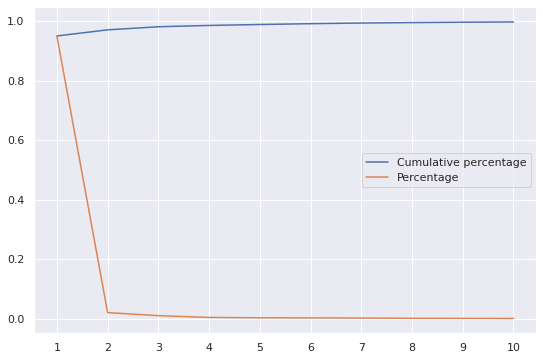

In [71]:
# without scaling

x = []
y_down = []
y_up = []
sum = 0

pca = model.fit(X)

for i in range(10):
    x.append(str(i+1))
    y_down.append(pca.explained_variance_ratio_[i])
    sum += pca.explained_variance_ratio_[i]
    y_up.append(sum)

sns.set(rc={'figure.figsize':(9,6)})
plt.plot(x,y_up, label='Cumulative percentage')
plt.plot(x, y_down, label='Percentage')
plt.legend()
plt.show()

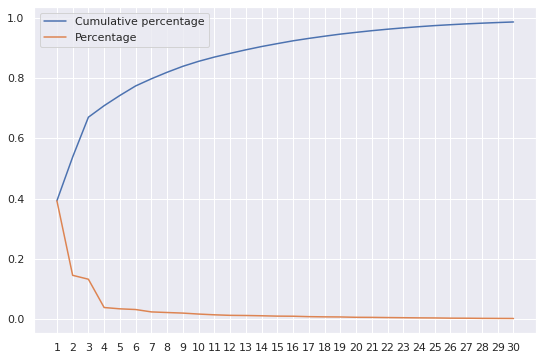

In [82]:
# with scaling

x = []
y_down = []
y_up = []
sum = 0

x_scaled = preprocessing.scale(X)

pca = model.fit(x_scaled)

for i in range(30):
    x.append(str(i+1))
    y_down.append(pca.explained_variance_ratio_[i])
    sum += pca.explained_variance_ratio_[i]
    y_up.append(sum)

sns.set(rc={'figure.figsize':(9,6)})
plt.plot(x,y_up, label='Cumulative percentage')
plt.plot(x, y_down, label='Percentage')
plt.legend()
plt.show()

In [93]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn import preprocessing
from sklearn.decomposition import PCA

# Import raw training data from CSV
train = pd.read_csv("/home/enrico/Temp/npf_train.csv")

# Drop unnecessary columns
train = train.drop(["id", "date", "partlybad"], axis=1)

# Remap categorical target column 
train['class4'] = train['class4'].map({'nonevent': 0, 'Ia': 1, 'Ib': 2, 'II': 3}).astype("category")

# Separate X and Y columns
train_x = train.drop("class4", axis=1)
train_y = train['class4']

# Create alternative Y coulumn mapped to 'non-event vs event' only
train_y_2 = train['class4'].apply(lambda y: 0 if y == 0 else 1).astype("category")

# Import raw test data (empty Y column)
test = pd.read_csv("/home/enrico/Temp/npf_test_hidden.csv")
test_x = test.drop(["id", "date", "class4", "partlybad"], axis=1)

In [85]:
def accuracy_c2(y_true, y_pred):
    y_true = y_true.apply(lambda y: 0 if y == 0 else 1).astype("category")
    y_pred = pd.Series(y_pred).apply(lambda y: 0 if y == 0 else 1).astype("category")
    return accuracy_score(y_true, y_pred)

def CV_class2_accuracy(model, x, y, n):
    accuracy_scores = []
    for _ in range(n):
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y)
        model.fit(Xtrain, Ytrain)
        pred = model.predict(Xtest)
        accuracy_scores.append(accuracy_c2(Ytest, pred))
    return np.sum(accuracy_scores)/n

In [89]:
# model
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)

In [90]:
# without pca
CV_class2_accuracy(clf, train_x, train_y, 4)

/home/enrico/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/enrico/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

0.8130434782608696

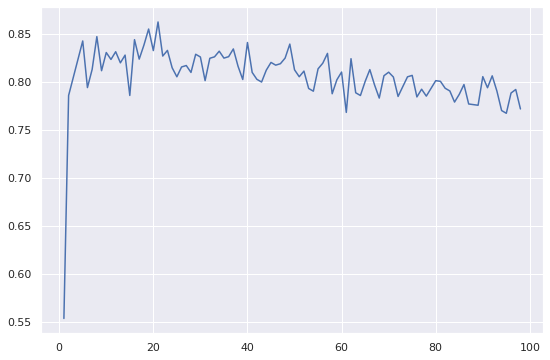

best= 0.8369565217391305 98


In [111]:
# with pca
xplot = []
yplot = []
m = 0

for i in range(1, 99):

    # Import raw training data from CSV
    train = pd.read_csv("/home/enrico/Temp/npf_train.csv")

    # Drop unnecessary columns
    train = train.drop(["id", "date", "partlybad"], axis=1)

    # Remap categorical target column 
    train['class4'] = train['class4'].map({'nonevent': 0, 'Ia': 1, 'Ib': 2, 'II': 3}).astype("category")

    # Separate X and Y columns
    train_x = train.drop("class4", axis=1)
    train_y = train['class4']

    # Create alternative Y coulumn mapped to 'non-event vs event' only
    train_y_2 = train['class4'].apply(lambda y: 0 if y == 0 else 1).astype("category")

    # Import raw test data (empty Y column)
    test = pd.read_csv("/home/enrico/Temp/npf_test_hidden.csv")
    test_x = test.drop(["id", "date", "class4", "partlybad"], axis=1)
    x_scaled = preprocessing.scale(train_x)
    modell = PCA(n_components=i)
    train_x = modell.fit_transform(x_scaled)

    t = CV_class2_accuracy(clf, train_x, train_y, 4)
    xplot.append(i)
    yplot.append(t-i)
    if m < t:
        m=t-(i)
        mi=i

plt.plot(xplot,yplot)
plt.show()
print('best=', t, i)